Building an activity classification model that predicts the activity the user is doing.

Algorithim - **Convolutional Neural Networks**


*   When we compare handcrafted features with CNN, CNN performance well and it gives better accuracy. It also learns different features from images.
*   In algorithm based image classification, we need to select the features(local, global) and classifiers.
* In CNN we model the convolution layer with ReLU activation to make all negative value to zero.

*Prerequisites for our model.*

In [ ]:
from google.colab import drive
import tensorflow
import cv2,os
import numpy as np

from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/A

/content/drive/MyDrive/A


In [ ]:
%tensorflow_version 1.x

TensorFlow is already loaded. Please restart the runtime to change versions.


In [ ]:
print(tensorflow.__version__)

2.7.0


Mapping each folder consisting of images with their names coded to values - [0,1,2,3]

In [ ]:
data_path='/content/drive/MyDrive/A'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary
print(label_dict)
print(categories)
print(labels)

{'Pushups_bottom': 0, 'Pushups_top': 1, 'Squats_down': 2, 'Squats_up': 3}
['Pushups_bottom', 'Pushups_top', 'Squats_down', 'Squats_up']
[0, 1, 2, 3]


In [ ]:
img_size=100
data=[]
target=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:  
            resized=cv2.resize(img,(img_size,img_size))
            #resizing the image  into 100x100, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)
        except Exception as e:
            print('Exception:',e)

Normalising the dataset

In [ ]:
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,3))
target=np.array(target)
from keras.utils import np_utils
new_target=np_utils.to_categorical(target)

In [ ]:
new_target.shape

(316, 4)

In [ ]:
data.shape

(316, 100, 100, 3)

In [ ]:
data.shape[1:]

(100, 100, 3)

Using Convolutional Neural Networks with Sequential model from TensorFlow since we require to efficiently classify the image dataset to predict their respective pose.

We use a Sequential model since it appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

In [ ]:
model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#Our input layer containing the image dataset
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(4,activation='softmax'))
#The Final layer with one output from four categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.layers

Once the model is built we will call for the below function to acquire a summary for our model.

```
model.summary()
```



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 200)       5600      
                                                                 
 activation (Activation)     (None, 98, 98, 200)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 200)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 100)       180100    
                                                                 
 activation_1 (Activation)   (None, 47, 47, 100)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 100)      0         
 2D)                                                    

Using SkiKit-Learn creating the four categories:
1. Training Data
2. Testing Data
3. Training Target 
4. Testing Target

In [ ]:
train_data,test_data,train_target,test_target=train_test_split(data,new_target,test_size=0.1)

In [ ]:
train_data.shape

(284, 100, 100, 3)

In [ ]:
train_target.shape

(284, 4)

In [ ]:
# checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

history=model.fit(train_data,train_target,epochs=20,validation_split=0.15)

Epoch 1/20
8/8 [==============================] - 18s 2s/step - loss: 1.3520 - accuracy: 0.3278 - val_loss: 1.3347 - val_accuracy: 0.3256
Epoch 2/20
8/8 [==============================] - 18s 2s/step - loss: 1.2811 - accuracy: 0.4066 - val_loss: 1.3012 - val_accuracy: 0.3488
Epoch 3/20
8/8 [==============================] - 19s 2s/step - loss: 1.1566 - accuracy: 0.5187 - val_loss: 1.2918 - val_accuracy: 0.4186
Epoch 4/20
8/8 [==============================] - 19s 2s/step - loss: 1.0024 - accuracy: 0.6432 - val_loss: 1.2498 - val_accuracy: 0.5116
Epoch 5/20
8/8 [==============================] - 19s 2s/step - loss: 0.7540 - accuracy: 0.7635 - val_loss: 1.5563 - val_accuracy: 0.4419
Epoch 6/20
8/8 [==============================] - 19s 2s/step - loss: 0.5528 - accuracy: 0.8299 - val_loss: 1.4819 - val_accuracy: 0.4651
Epoch 7/20
8/8 [==============================] - 19s 2s/step - loss: 0.3637 - accuracy: 0.9004 - val_loss: 1.7235 - val_accuracy: 0.4419
Epoch 8/20
8/8 [==================

In [ ]:
model.save('exercise_model.h5')

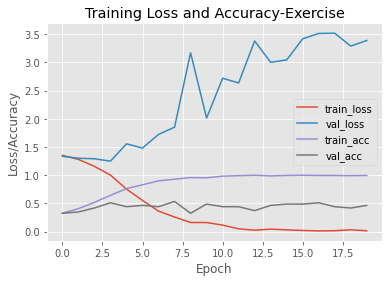

In [ ]:
N = 20
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy-Exercise")
plt.xlabel("Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("CNN_Model_Exercise")